In [1]:
# select the csv file where you saved temperature data from 16 channels 

%pwd
%cd data
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from scipy import signal
from StringIO import StringIO

# change font
from matplotlib import rcParams
font = {'size'   : 24}
matplotlib.rc('font', **font)

# open file 
import Tkinter, tkFileDialog
root = Tkinter.Tk() # make a top-level instance and hide since it is ugly and big
root.withdraw()
root.overrideredirect(True) # make it almost invisible - no decorations, 0 size, top left corner
root.geometry('0x0+0+0')
root.deiconify() # show window again and lift it to top so it can get focus
root.lift() # otherwise dialogs will end up behind the terminal.
root.focus_force()

fname1 = tkFileDialog.askopenfilename(parent=root)
fname1_blank1 = str(fname1).replace(".csv", "")
#fname1 = "yk_5ma_25pf_50k_1_Volts_20170518_000149.xls"
#fname1_blank1 = "yk_5ma_25pf_50k_1_Volts_20170518_000149"
root.destroy() # get rid of the top-level instance once to make it actually invisible

data = np.genfromtxt(fname1, delimiter=',', skip_footer=0, skip_header=0,dtype=str)

pixel_id = data[4::,0]
temp = data[2,1::]
temp = np.array(temp)
temp = temp.astype(np.float)
s = []
for sensor in range (0,len(pixel_id)):
    s.append((data[4+sensor,1::]))
    
s = np.array(s)
s = s.astype(np.float)



C:\Users\Yasser Khan\Dropbox\project_thermistor\project_thermistor_share\thermistor_array_driver\desktop_app\data
Populating the interactive namespace from numpy and matplotlib


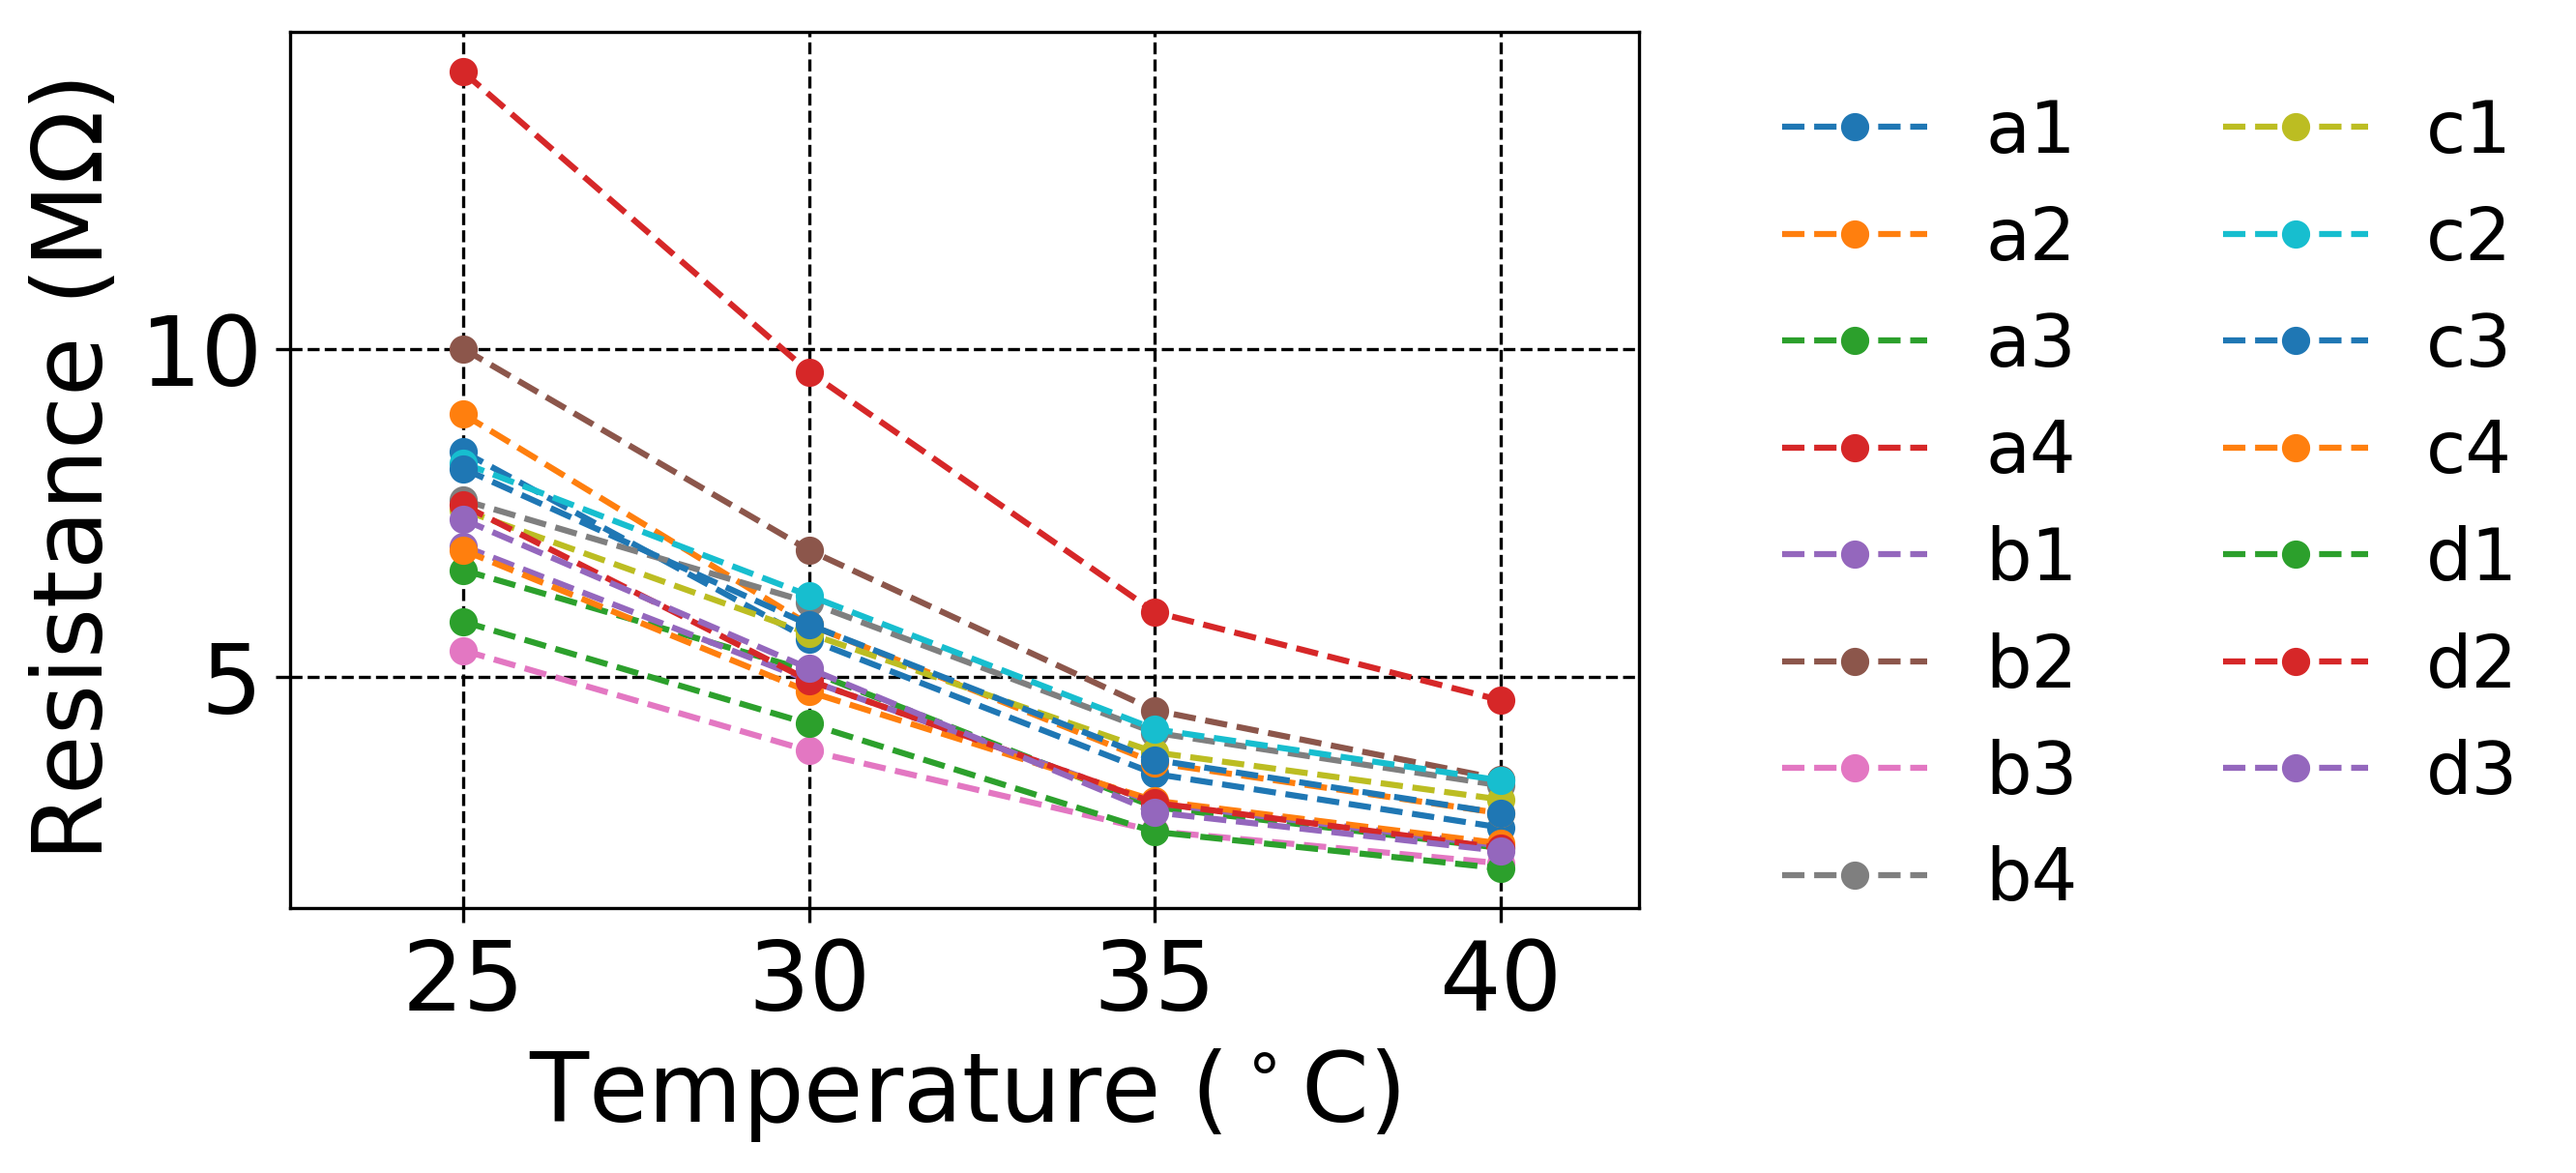

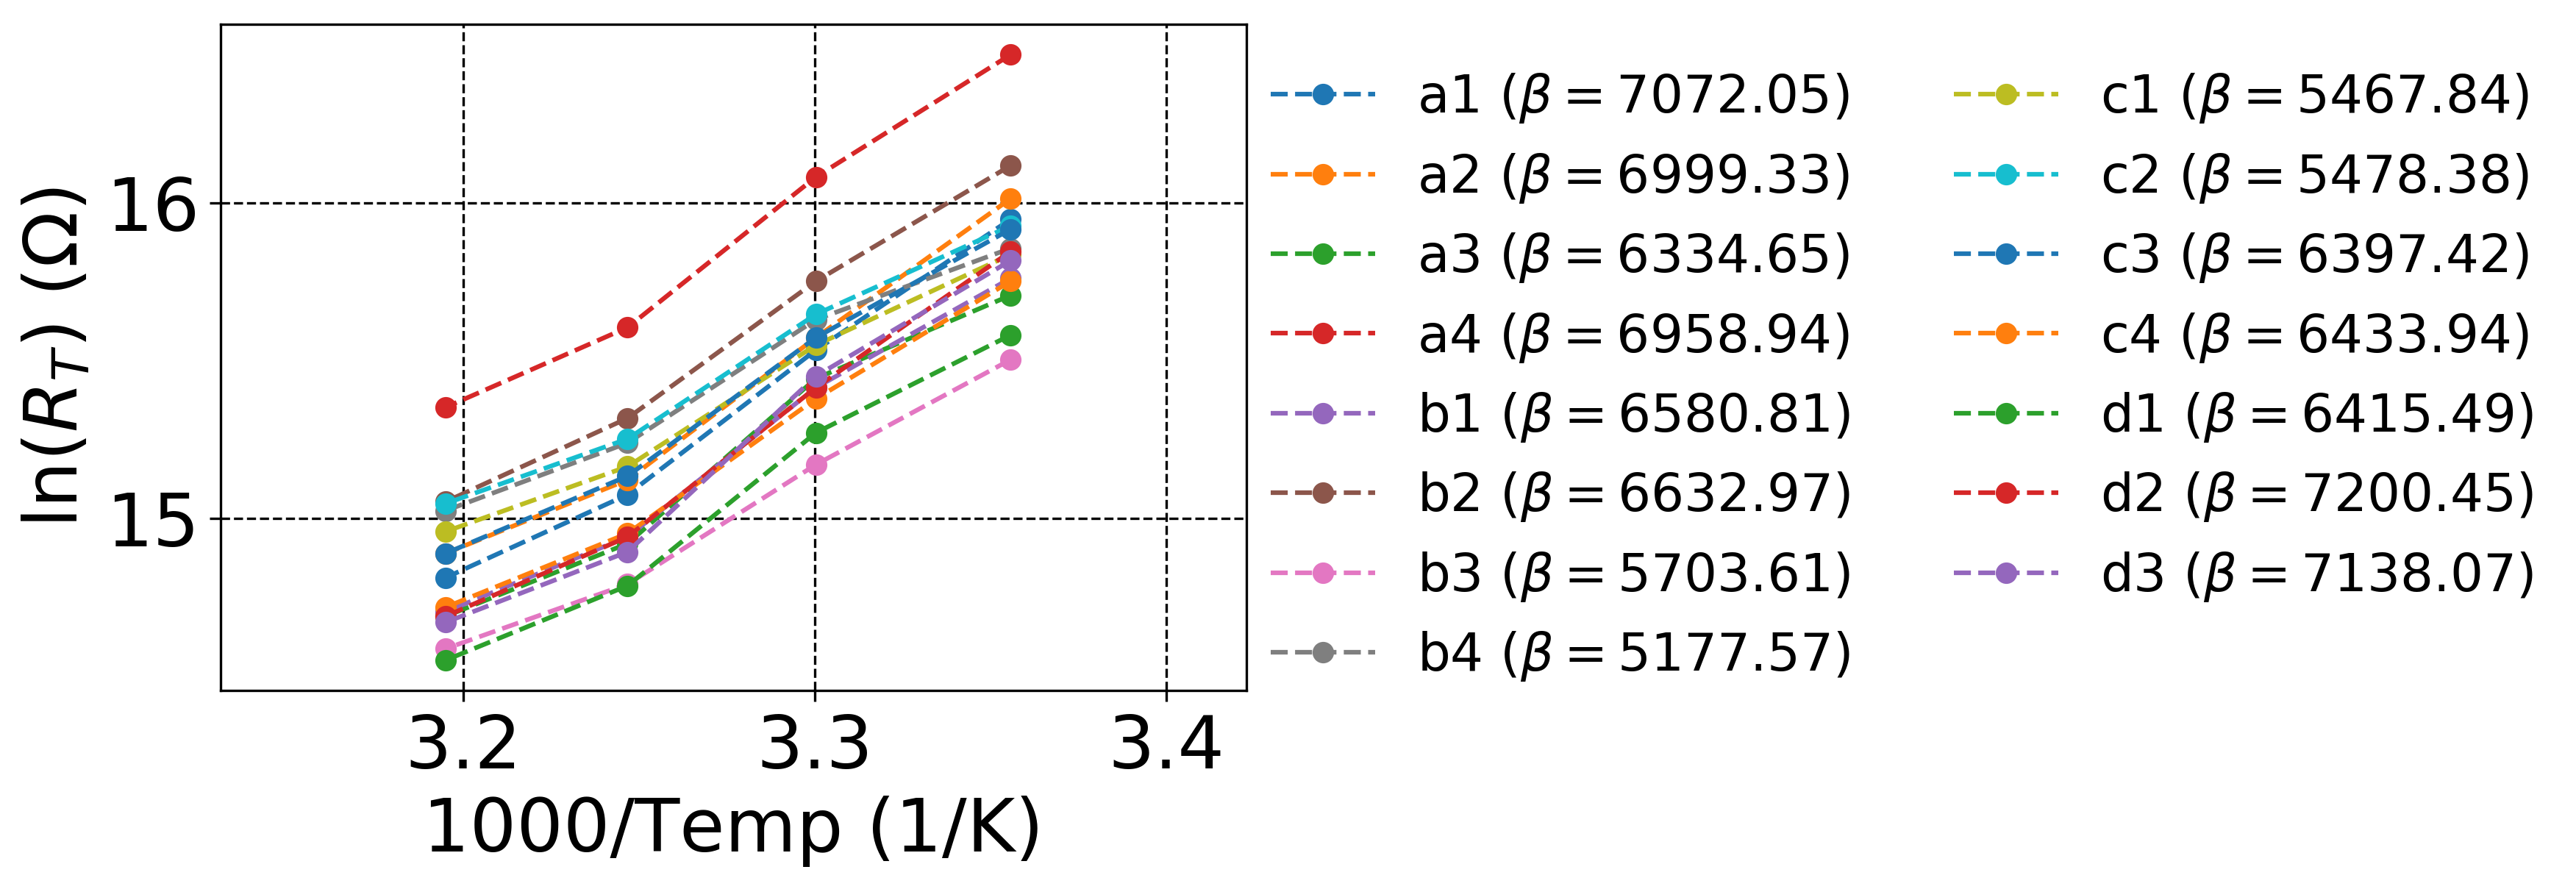

In [3]:
fig, (ax1) = plt.subplots(1,1, sharex=True, dpi=300, facecolor='w', edgecolor='w')

# select which pixels to plot
therms_to_plot = np.arange(0,len(pixel_id),1)
#therms_to_plot = [0,1,2,6,7,10,12,13,14] # 0-15

for i in therms_to_plot:
    ax1.plot(temp, s[i], linestyle="dashed", marker="o", label=pixel_id[i])

# x ticks
xs1_hi = 1.05*float(max(temp))
xs1_lo = .9*float(min(temp))
ax1.set_xlim(xs1_lo,xs1_hi)
#xticks1 = np.linspace(xs1_lo,xs1_hi,num=6)
#xticks11 = np.around(xticks1,decimals=1)
#ax1.set_xticks(xticks11)

# y ticks
# ys1_hi = 1.1*np.max(s)
# ys1_lo = .9*np.min(s)
# ax1.set_ylim(ys1_lo,ys1_hi)
# yticks1 = np.linspace(ys1_lo,ys1_hi,num=8)
# yticks11 = np.around(yticks1,decimals=1)
# ax1.set_yticks(yticks11)

ax1.set_ylabel(r'Resistance (M$\Omega$)')
ax1.set_xlabel(r'Temperature ($^\circ$C)')

#grid lines
grid(b=True, which='major', color='k', linestyle='--')
# grid(b=True, which='minor', color='k', linestyle='--')
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

#legends
leg1 = plt.legend(bbox_to_anchor=(1.7, 1), ncol=2, fontsize = 18, fancybox=True)# bbox_to_anchor=(1, 1)#\
leg1.get_frame().set_alpha(0)

#show plot
plt.show()

fig.savefig(fname1_blank1+'_plot.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0)

dy = []
dx = []
beta_n = []
sm = []
temp_n = temp + 273

for i in range (0,len(pixel_id)):
    sm.append(np.log(s[i]*1e6))
    dy.append(sm[i][0]-sm[i][-1])
    dx.append((1000/temp_n[0])-(1000/temp_n[-1]))
    beta_n.append(1000*(dy[i] / dx[i]))

fig, (ax2) = plt.subplots(1,1, dpi=300, facecolor='w', edgecolor='w')

for i in therms_to_plot:
    ax2.plot(1000/temp_n, sm[i], linestyle="dashed", marker="o", label =r'%s ($\beta=%2.2f$)'%(pixel_id[i],beta_n[i]))
    #ax1.plot(temp, s[i], linestyle="dashed", marker="o", label="s{0}".format(i+1))    

ax2.set_ylabel(r'ln($R_T$) ($\Omega$)')
ax2.set_xlabel(r'1000/Temp (1/K)')

#title
#plt.title(r'Line Resistance: $\mu=%2.2f$, $\sigma=%2.2f$'%(mur, sigmar),**title_font)
# x ticks
xs2_hi = 1.02*np.amax(1000/temp_n)
xs2_lo = .98*np.amin(1000/temp_n)
ax2.set_xlim(xs2_lo,xs2_hi)
#xticks1 = np.linspace(xs1_lo,xs1_hi,num=6)
#xticks11 = np.around(xticks1,decimals=1)
#ax1.set_xticks(xticks11)

# y ticks
# ys2_hi = 1.02*np.amax(sm)
# ys2_lo = .98*np.amin(sm)
# ax2.set_ylim(ys2_lo,ys2_hi)
# yticks2 = np.linspace(ys2_lo,ys2_hi,num=8)
# yticks22 = np.around(yticks2,decimals=1)
# ax2.set_yticks(yticks22)

#grid lines
grid(b=True, which='major', color='k', linestyle='--')
#grid(b=True, which='minor', color='k', linestyle='--')
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

#legends
leg1 = plt.legend(bbox_to_anchor=(2.3, 1.0), ncol=2, fontsize = 17, fancybox=True)# bbox_to_anchor=(1, 1)#\
leg1.get_frame().set_alpha(0)

plt.show()

fig.savefig(fname1_blank1+'_beta_plot.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0)